# Customer Churn Analysis

## Data Description

Customer churn is when a company’s customers stop doing business with that company and when a customer re-chooses the same company it's called customer retention. Businesses consider measuring churn very important because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and good quality products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base and build strategies based on underlying reasons causing it.

For telecommunication sector it is important to attract new customers as well as prevent customer churn, as the barriers to entity for switching services is low. 

The data provided is customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
import pickle

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [3]:
df=pd.read_csv(r"Telecom_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Features:

1. CustomerID — Customer ID

2. Gender — Whether the customer is a male or a female

3. SeniorCitizen — Whether the customer is a senior citizen or not (1, 0)

4. Partner — Whether the customer has a partner or not (Yes, No)

5. Dependents — Whether the customer has dependents or not (Yes, No)

6. Tenure — Number of months the customer has stayed with the company

7. PaperlessBilling — Whether the customer has paperless billing (Yes, No)

8. PaymentMethod — The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

9. MonthlyCharges — The amount charged to the customer monthly

10. TotalCharges — The total amount charged to the customer

11. Contract — The contract term of the customer (Month-to-month, One year, Two year)

12. MultipleLines — Whether the customer has multiple lines (Yes, No, No phone service)

13. InternetService — Customer’s internet service provider (DSL, Fiber optic, No)

14. OnlineSecurity — Whether the customer has online security (Yes, No, No internet service)

15. OnlineBackup — Whether the customer has online backup (Yes, No, No internet service)

16. DeviceProtection — Whether the customer has device protection (Yes, No, No internet service)

17. TechSupport — Whether the customer has tech support (Yes, No, No internet service)

18. StreamingTV — Whether the customer has streaming TV (Yes, No, No internet service)

19. StreamingMovies — Whether the customer has streaming movies (Yes, No, No internet service)

20. PhoneService — Whether the customer has a phone service (Yes, No)

#### Target Variable

21. Churn — Whether the customer churned or not (Yes or No)

## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
df.shape

(7043, 21)

Number of rows = 7043

Number of columns = 21

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(7043, 21)

No duplicate data exist

We will now conver "TotalCharges" column to float datatype

In [9]:
# Changing to float data type
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors='coerce')
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [10]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Total Charges has missing data

### Univariate Analysis

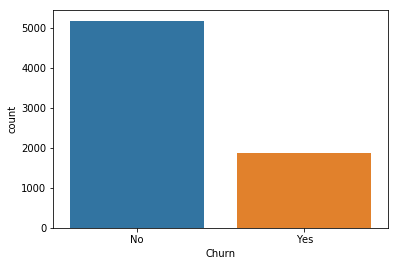

In [11]:
sns.countplot(df["Churn"])

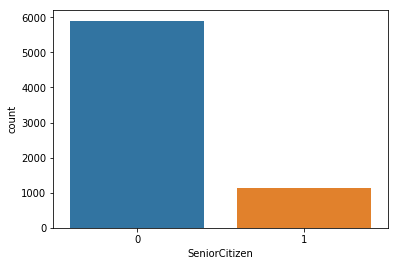

In [12]:
sns.countplot(df["SeniorCitizen"])

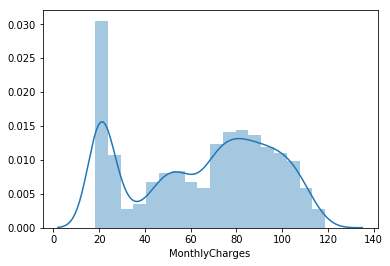

In [13]:
sns.distplot(df["MonthlyCharges"])

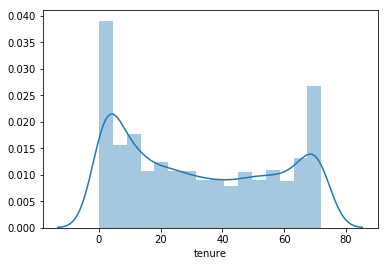

In [14]:
sns.distplot(df["tenure"])

### Bivariate Analysis

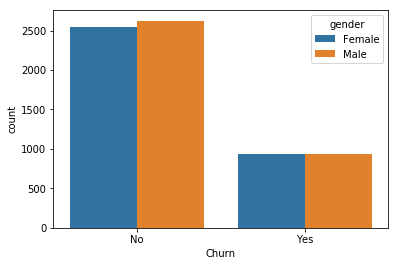

In [15]:
sns.countplot(df["Churn"],hue=df["gender"])   
plt.show()

Gender has no such effect on customer churn

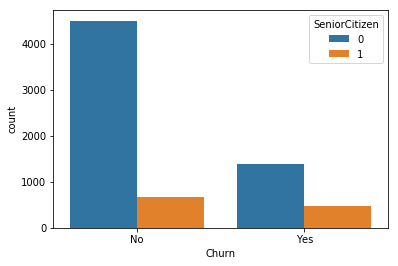

In [16]:
sns.countplot(df["Churn"],hue=df["SeniorCitizen"])   
plt.show()

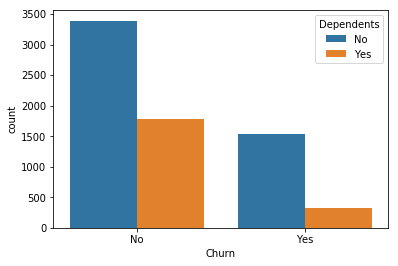

In [17]:
sns.countplot(df["Churn"],hue=df["Dependents"])   
plt.show()

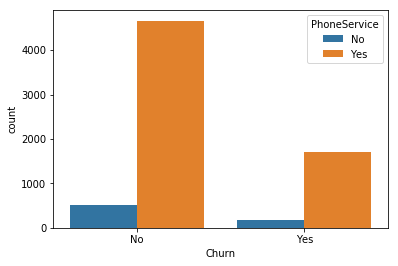

In [18]:
sns.countplot(df["Churn"],hue=df["PhoneService"])   
plt.show()

No such conclusions can be made from all the above graphs

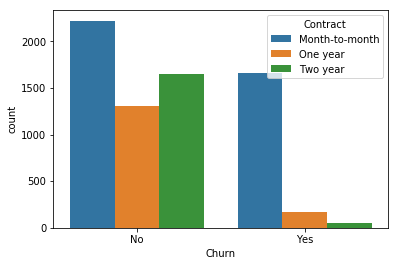

In [19]:
sns.countplot(df["Churn"],hue=df["Contract"])   
plt.show()

People with contract of 2 years are less likely to churn

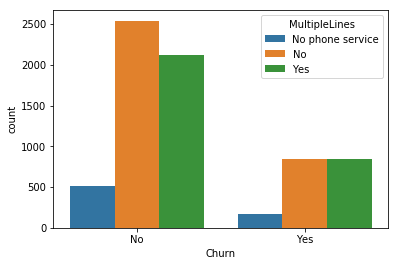

In [20]:
sns.countplot(df["Churn"],hue=df["MultipleLines"])   
plt.show()

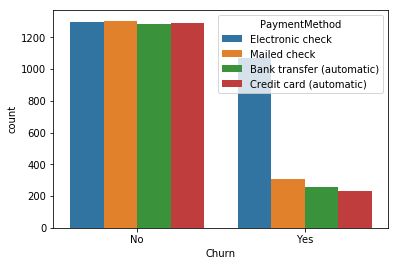

In [21]:
sns.countplot(df["Churn"],hue=df["PaymentMethod"])   
plt.show()

Customers using electronic check as payment method are more among those causing customer churn

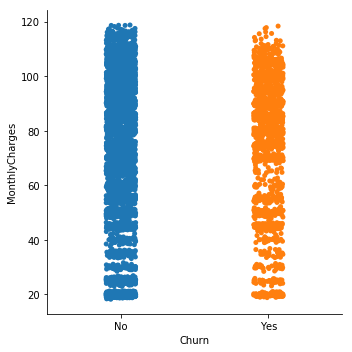

In [22]:
sns.catplot(x="Churn", y= "MonthlyCharges", data=df)

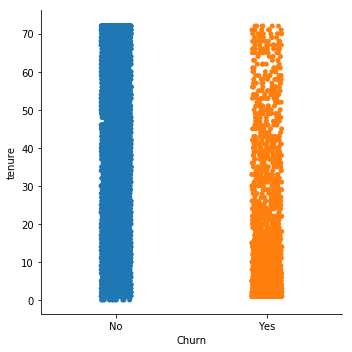

In [23]:
sns.catplot(x="Churn", y= "tenure", data=df)

Looking at statistics of data

In [24]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


We can observe mean, standard deviation, minimum, maximum and quartiles of each column having numeric data

##### SeniorCitizen:

mean = 0.1621, std = 0.3686 , min = 0 , max = 1

##### tenure:

mean = 32.3711, std = 24.55948 , min = 0 , max = 72

##### MonthlyCharges:

mean = 64.7616, std = 30.09 , min = 18.25 , max = 118.75

##### TotalCharges:

mean = 2283.3, std = 2266.7713 , min = 18.8 , max = 8684.8


Since number of rows having missing data is less we will drop those rows

In [25]:
df=df[df['TotalCharges'].notnull()]

In [26]:
df.shape

(7032, 21)

We will now encode data to make it easy for further consideration in model

In [27]:
obj_lst=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']
lab_enc= LabelEncoder()
for i in obj_lst:
    df1= lab_enc.fit_transform(df[i])
    df[i]=df1
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


 ### Correlation

In [28]:
df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006235,-0.002368,-0.026509,-0.011871,0.007209,-0.006987,0.004497,-0.012335,0.013740,...,-0.006726,0.001763,-0.007650,-0.017207,0.015949,-0.002225,0.011754,-0.004445,-0.000263,-0.017858
gender,0.006235,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,...,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.002368,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,...,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.026509,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,...,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,-0.011871,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,...,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.007209,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,...,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.006987,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,...,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,0.004497,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,...,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.012335,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,...,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,0.013740,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,...,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050


### Heatmap

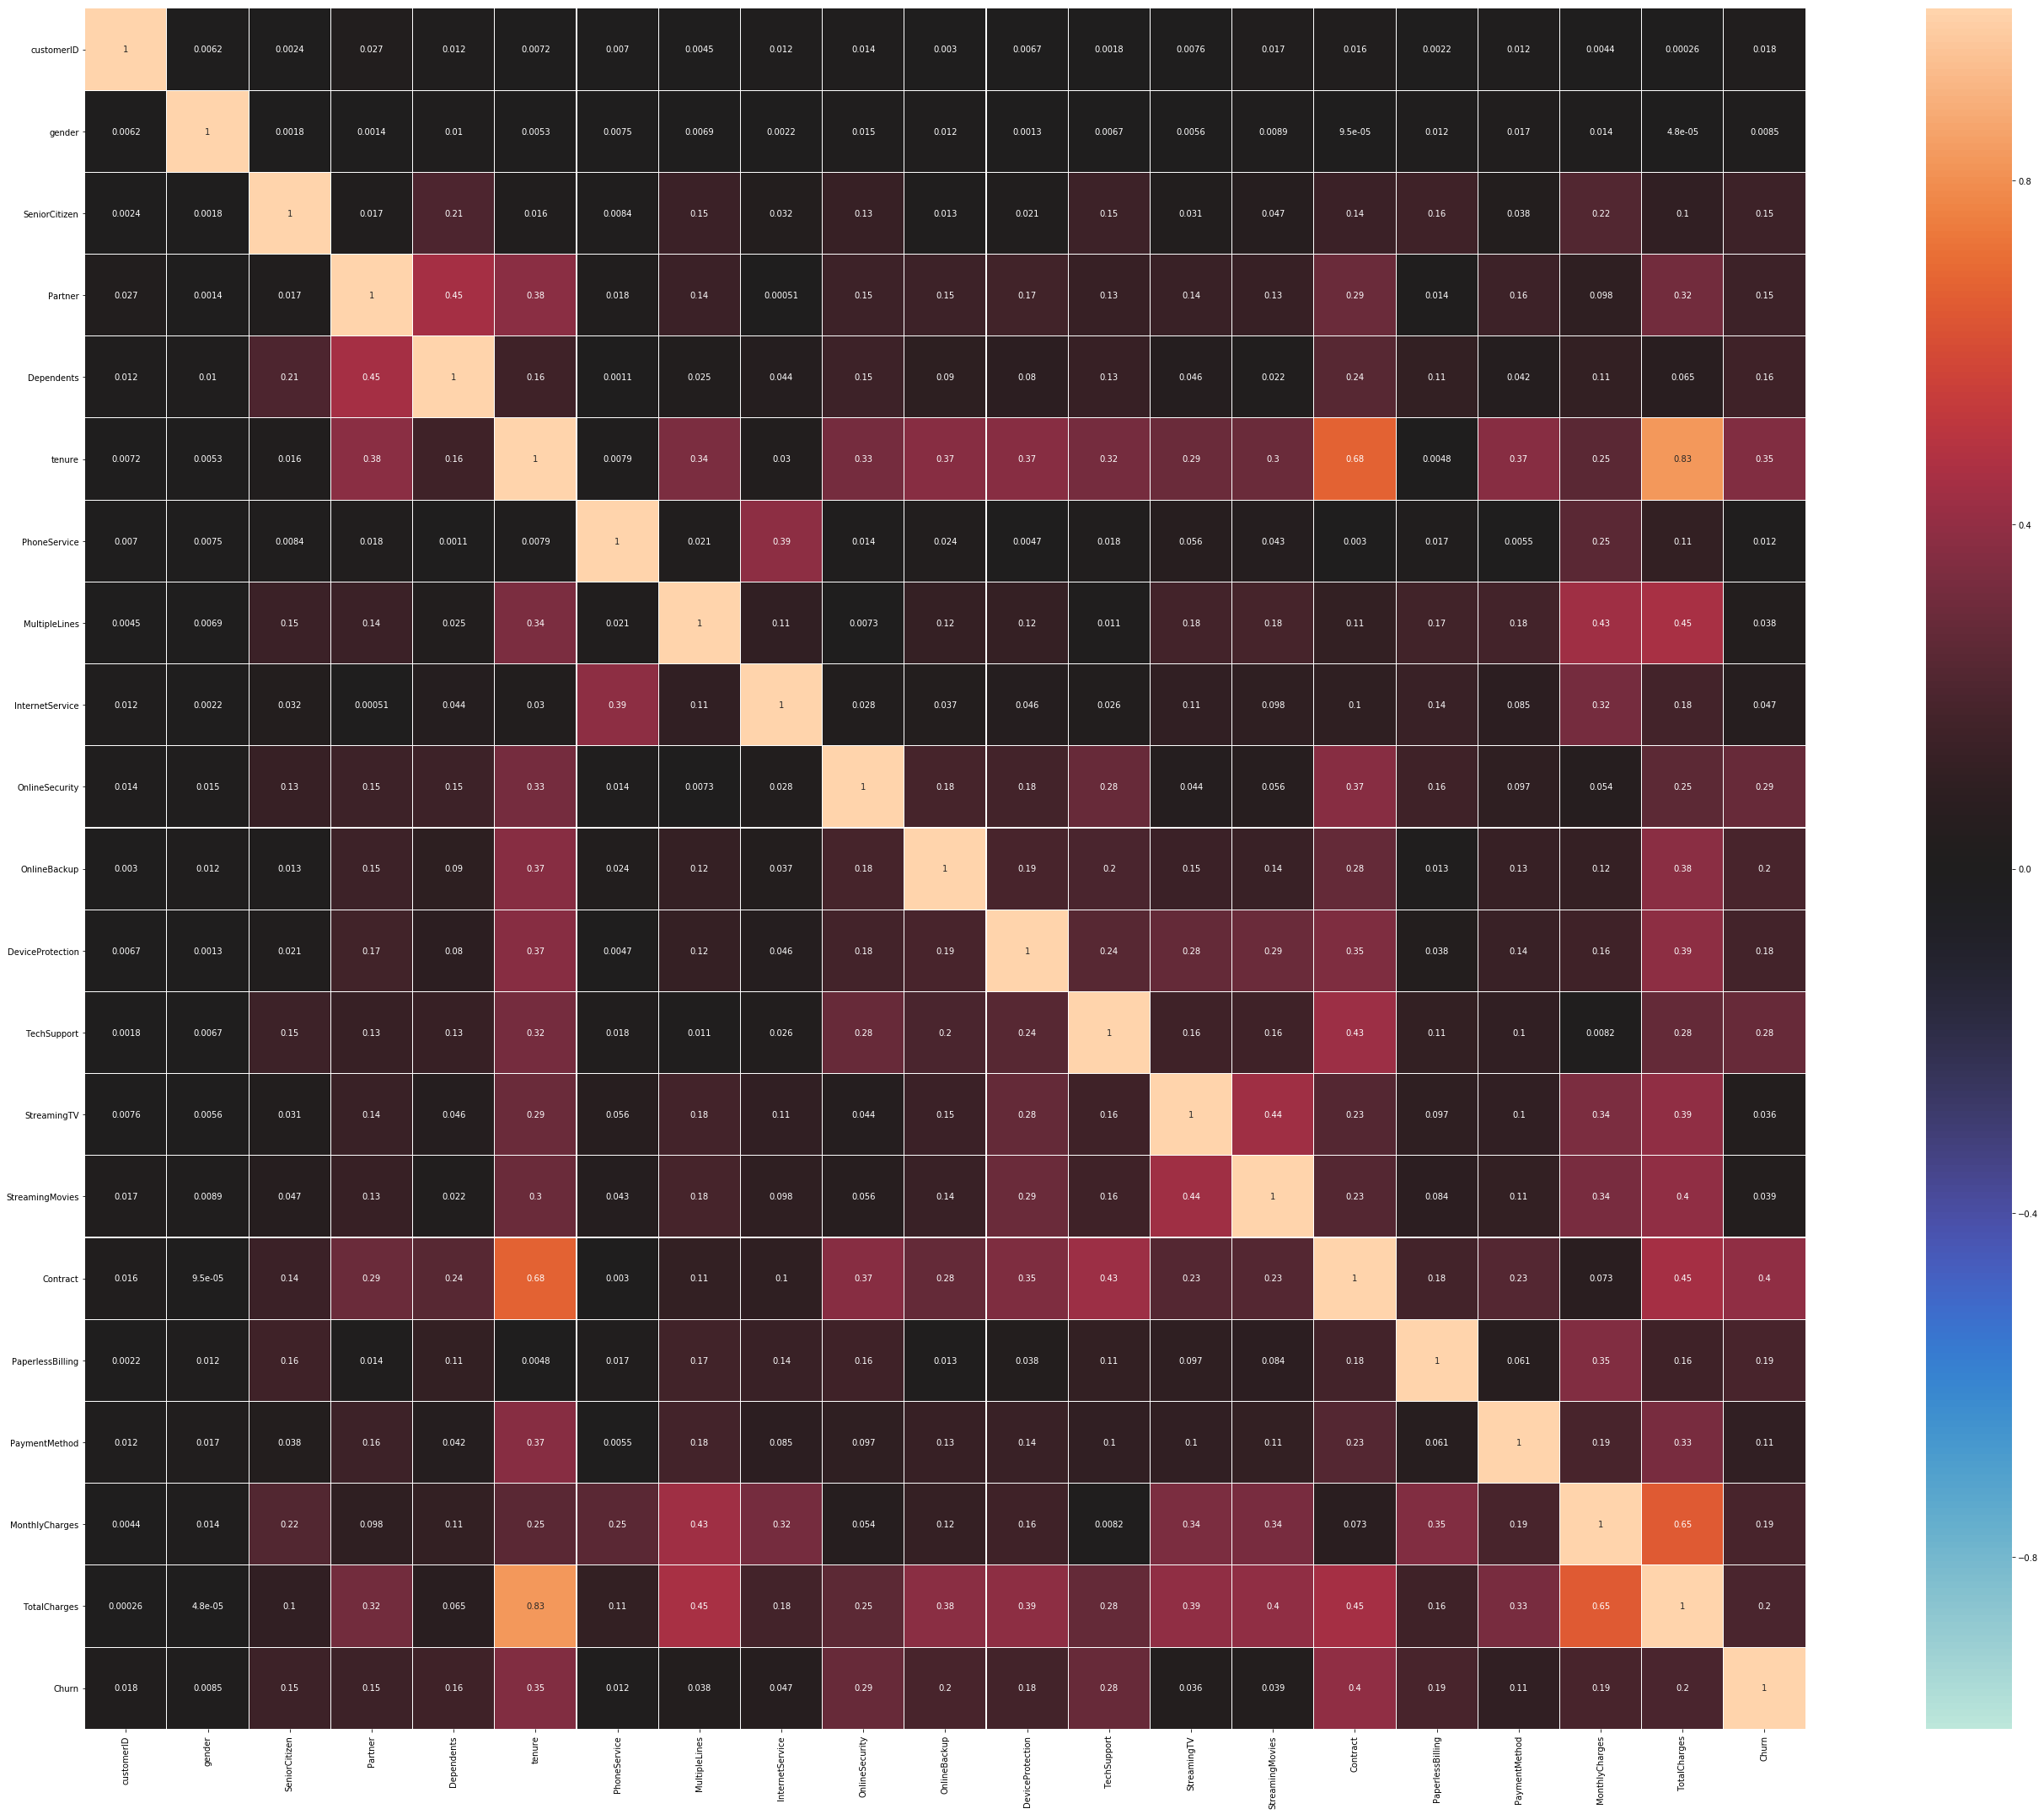

In [29]:
## HeatMap
df_corr= df.corr().abs()
plt.figure(figsize=(40,30))
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, square=True, center=0, fmt='.2g', linewidth=.1)
plt.tight_layout()

In [30]:
corr_mat=df.corr()
corr_mat["Churn"].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
customerID         -0.017858
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

We observe multicollinearity here between tenure and contract, total charges and monthly charges and total charges and tenure.

Minimum correlation : Gender

Maximum correlation : Contract

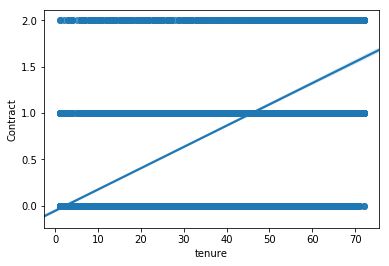

In [31]:
sns.regplot(x="tenure", y= "Contract", data= df)

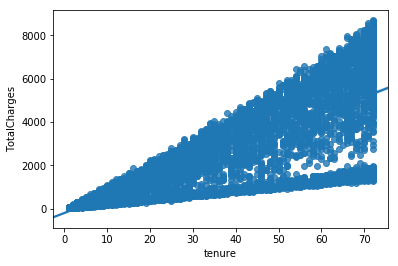

In [32]:
sns.regplot(x="tenure", y= "TotalCharges", data= df)

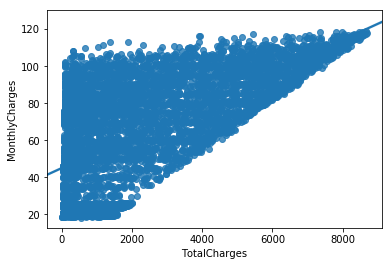

In [33]:
sns.regplot(x="TotalCharges", y= "MonthlyCharges", data= df)

By looking at graphs we are not able to conclude direct relationship so we won't drop any column

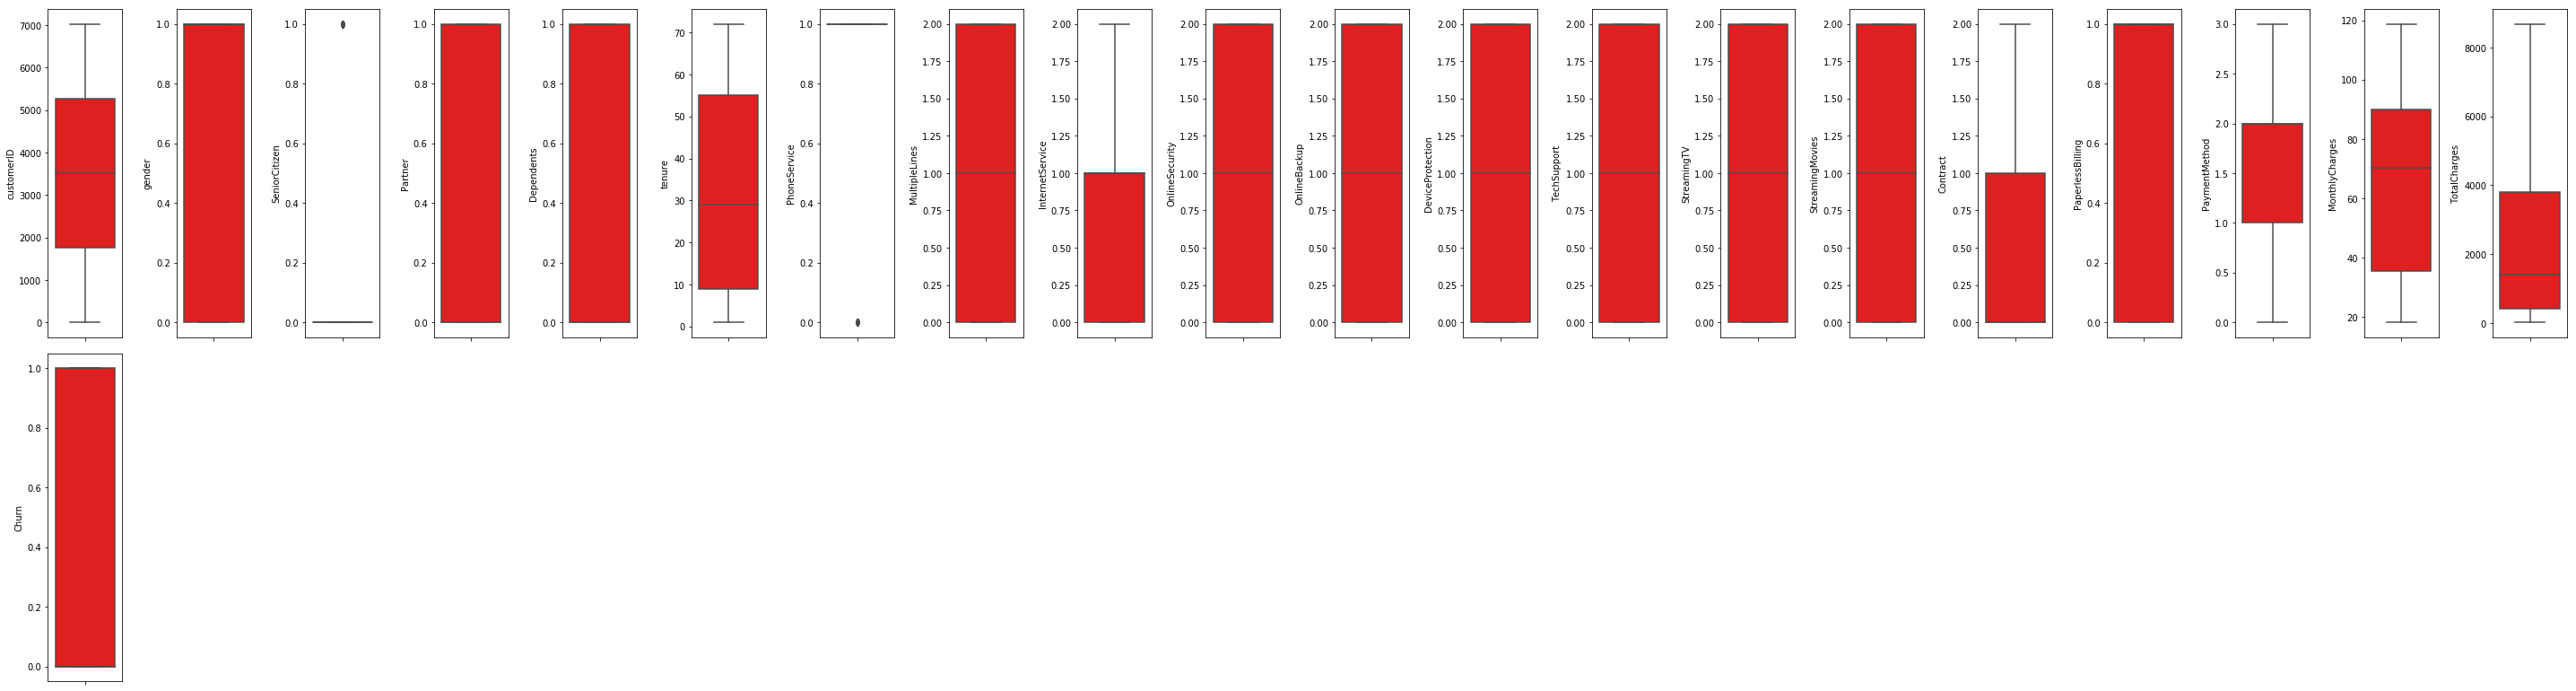

In [34]:
collist=df.columns.values
plt.figure(figsize=(40,80))
for i in range(0,len(collist)):
    plt.subplot(15,20,i+1)
    sns.boxplot(df[collist[i]],color='red',orient='v')
    plt.tight_layout()

No outliers observed

#### Check for skewness

In [35]:
df.skew()

customerID          0.000000
gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingTV         0.029366
StreamingMovies     0.013851
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
TotalCharges        0.961642
Churn               1.060622
dtype: float64

In [36]:
df["TotalCharges"]=np.sqrt(df["TotalCharges"])

In [37]:
df.skew()

customerID          0.000000
gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingTV         0.029366
StreamingMovies     0.013851
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
TotalCharges        0.308926
Churn               1.060622
dtype: float64

We have successfully removed skewness of continuous data now we will proceed to model building

## Model Building

In [38]:
x=df.drop(columns=["Churn"],axis=1)
y=df["Churn"]

In [39]:
## Scaling data
scale= StandardScaler()
x_scaled=scale.fit_transform(x)

#### Finding best random state

In [40]:
lr=LogisticRegression()
for i in range(0,500):
    x_train, x_test, y_train, y_test= train_test_split(x_scaled, y , test_size=0.25, random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    score_lr=accuracy_score(y_test,pred_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("Best random state is ",i)
        print("Training Score ",accuracy_score(y_train,pred_train)*100)
        print("Testing Score ",accuracy_score(y_test,pred_test)*100)

Best random state is  15
Training Score  80.52711414486159
Testing Score  80.54607508532423
Best random state is  122
Training Score  80.48919226393629
Testing Score  80.48919226393629
Best random state is  123
Training Score  80.3754266211604
Testing Score  80.43230944254836
Best random state is  128
Training Score  80.62191884717483
Testing Score  80.60295790671216
Best random state is  283
Training Score  80.54607508532423
Testing Score  80.48919226393629
Best random state is  321
Training Score  80.47023132347364
Testing Score  80.54607508532423
Best random state is  356
Training Score  80.62191884717483
Testing Score  80.60295790671216
Best random state is  385
Training Score  80.54607508532423
Testing Score  80.48919226393629
Best random state is  394
Training Score  80.54607508532423
Testing Score  80.54607508532423
Best random state is  473
Training Score  80.48919226393629
Testing Score  80.48919226393629
Best random state is  481
Training Score  80.64087978763746
Testing Scor

In [41]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled, y , test_size=0.25, random_state=356)

#### Logistic Regression

In [43]:
lr=LogisticRegression()
lr.fit(x_train, y_train)
y_pred= lr.predict(x_test)
score_lr=accuracy_score(y_test,y_pred)
print("Logistic Regression model Score =",accuracy_score(y_test,y_pred))
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred),"\n")
print("Classification Report:\n",classification_report(y_test,y_pred,digits=2))

Logistic Regression model Score = 0.8060295790671217
Confusion Matrix :
 [[1167  141]
 [ 200  250]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1308
           1       0.64      0.56      0.59       450

    accuracy                           0.81      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.80      0.81      0.80      1758



#### KNN Model

In [44]:
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred= knn.predict(x_test)
score_knn=accuracy_score(y_test,y_pred)
print("knn model Score =",accuracy_score(y_test,y_pred))
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred),"\n")
print("Classification Report:\n",classification_report(y_test,y_pred,digits=2))

knn model Score = 0.7519908987485779
Confusion Matrix :
 [[1105  203]
 [ 233  217]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.84      1308
           1       0.52      0.48      0.50       450

    accuracy                           0.75      1758
   macro avg       0.67      0.66      0.67      1758
weighted avg       0.75      0.75      0.75      1758



#### Decision Tree Model

In [45]:
dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred= dt.predict(x_test)
score_dt=accuracy_score(y_test,y_pred)
print("Decision Tree model Score =",accuracy_score(y_test,y_pred))
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred),"\n")
print("Classification Report:\n",classification_report(y_test,y_pred,digits=2))

Decision Tree model Score = 0.7161547212741752
Confusion Matrix :
 [[1019  289]
 [ 210  240]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80      1308
           1       0.45      0.53      0.49       450

    accuracy                           0.72      1758
   macro avg       0.64      0.66      0.65      1758
weighted avg       0.73      0.72      0.72      1758



#### SVM

In [46]:
svc= SVC()
svc.fit(x_train,y_train)
y_pred= svc.predict(x_test)
score_svc=accuracy_score(y_test,y_pred)
print("SVM model Score =",accuracy_score(y_test,y_pred))
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred),"\n")
print("Classification Report:\n",classification_report(y_test,y_pred,digits=2))

SVM model Score = 0.8026166097838453
Confusion Matrix :
 [[1185  123]
 [ 224  226]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1308
           1       0.65      0.50      0.57       450

    accuracy                           0.80      1758
   macro avg       0.74      0.70      0.72      1758
weighted avg       0.79      0.80      0.79      1758



#### Model Evaluation

Using cross validation score to determine best model

#### Logistic Regression

In [47]:
cross_val_score(lr, x_scaled, y, cv=5)
cvs_lr=cross_val_score(LogisticRegression(), x_scaled, y, cv=5).mean()
print("Logistic Regression Cross Validation score= ",cvs_lr)

Logistic Regression Cross Validation score=  0.8043223225469888


#### KNN Model

In [48]:
cvs_knn=cross_val_score(knn, x_scaled, y, cv=5).mean()
print("KNeighborsClassifier Cross Validation score= ",cvs_knn)

KNeighborsClassifier Cross Validation score=  0.7588165654151513


#### Decision Tree Model

In [49]:
cross_val_score(dt, x_scaled, y, cv=5)
cvs_dt=cross_val_score(DecisionTreeClassifier(), x_scaled, y, cv=5).mean()
print("DecisionTree Classifier Cross Validation score= ",cvs_dt)

DecisionTree Classifier Cross Validation score=  0.7269608066151664


#### SVM

In [50]:
cross_val_score(svc, x_scaled, y, cv=5)
cvs_svm=cross_val_score(SVC(), x_scaled, y, cv=5).mean()
print("SVC Cross Validation score= ",cvs_svm)

SVC Cross Validation score=  0.7987772982274162


We will now check for difference between accuracy score and cross validation score

In [51]:
print("Logistic Regression: ",(score_lr-cvs_lr))

Logistic Regression:  0.001707256520132927


In [52]:
print("KNN Model: ",(score_knn-cvs_knn))

KNN Model:  -0.00682566666657336


In [53]:
print("Decision Tree: ",(score_dt-cvs_dt))

Decision Tree:  -0.010806085340991145


In [54]:
print("SVM: ",(score_svc-cvs_svm))

SVM:  0.003839311556429137


By considering above metrics we conclude Logistic regression model as our best model

#### ROC AUC Curve

In [55]:
print("ROC_AUC_Score for decisiontreeClassifier= ",roc_auc_score(y_test,dt.predict(x_test)))

print("ROC_AUC_Score for Logistic Regression= ",roc_auc_score(y_test,lr.predict(x_test)))

print("ROC_AUC_Score for KNeighboursClassifier= ",roc_auc_score(y_test,knn.predict(x_test)))

print("ROC_AUC_Score for SVM= ",roc_auc_score(y_test,svc.predict(x_test)))

ROC_AUC_Score for decisiontreeClassifier=  0.6561926605504587
ROC_AUC_Score for Logistic Regression=  0.7238786952089705
ROC_AUC_Score for KNeighboursClassifier=  0.6635117227319062
ROC_AUC_Score for SVM=  0.7040927624872578


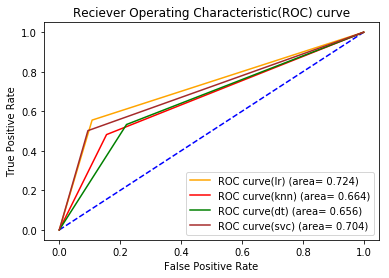

In [56]:
fpr, tpr, threshold= roc_curve(y_test,lr.predict(x_test))
plt.plot(fpr,tpr,color='orange',label='ROC curve(lr) (area= %0.3f)'%(roc_auc_score(y_test,lr.predict(x_test))))
plt.plot([0,1],[0,1], color='blue', linestyle='--')

fpr, tpr, threshold= roc_curve(y_test,knn.predict(x_test))
plt.plot(fpr,tpr,color='red', label='ROC curve(knn) (area= %0.3f)'%(roc_auc_score(y_test,knn.predict(x_test))))

fpr, tpr, threshold= roc_curve(y_test,dt.predict(x_test))
plt.plot(fpr,tpr,color='green', label='ROC curve(dt) (area= %0.3f)'%(roc_auc_score(y_test,dt.predict(x_test))))

fpr, tpr, threshold= roc_curve(y_test,svc.predict(x_test))
plt.plot(fpr,tpr,color='brown', label='ROC curve(svc) (area= %0.3f)'%(roc_auc_score(y_test,svc.predict(x_test))))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic(ROC) curve')
plt.legend(loc='lower right')
plt.show() 

### Hyper Parameter Tuning

In [57]:
lr= LogisticRegression()
param={"tol":[0.0001,0.0011,0.0021],"penalty":["l1","l2","elasticnet","none"],
       "max_iter":[100,200],"multi_class":["ovr","multinomial"]}
grid_search=GridSearchCV(estimator=lr, param_grid=param, cv=5, n_jobs=-1)
grid_search.fit(x_train,y_train)
best_parameter=grid_search.best_params_
print(best_parameter)

{'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'none', 'tol': 0.0001}


In [58]:
clf=LogisticRegression(tol=0.0001,max_iter=100,multi_class="ovr",penalty="none")
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.8048919226393629

In [59]:
cfm =confusion_matrix(y_test,y_pred)
print("Accuracy Score :",clf.score(x_test,y_test))
print("Confusion Matrix :\n",cfm,"\n")
print("Classification Report:\n",classification_report(y_test,y_pred,digits=2))
print("\n ROC_AUC_Score for Logistic Regression= ",roc_auc_score(y_test,clf.predict(x_test)))

Accuracy Score : 0.8048919226393629
Confusion Matrix :
 [[1185  123]
 [ 224  226]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1308
           1       0.65      0.50      0.57       450

    accuracy                           0.80      1758
   macro avg       0.74      0.70      0.72      1758
weighted avg       0.79      0.80      0.79      1758


 ROC_AUC_Score for Logistic Regression=  0.7216564729867482


#### Saving Model

In [60]:
filename= "CustomerChurn.pickle"
pickle.dump(clf,open(filename,'wb'))